In [40]:
#importing required libraries
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [41]:
# reading excel
data= pd.read_csv("C:\\Users\\samni\\Downloads\\RFM_Analysis.csv")
data.head()

,ModifiedStore,ModifiedStoreCode,ModifiedTxnDate,ModifiedTxnTime,ModifiedBillNo,UniqueItemName,UniqueItemCode,Barcode,ItemQty,ItemMRP,ItemGrossAmount,ItemNetAmount,ItemPaidAmount,ItemDiscountAmount,Customer Id
0,Guwahati - Fancy Bazar,TLHOS0093,01-12-2017,10:44:52,CM/01426/Dec/17,PLAINS,8.91E+12,8.91E+12,1,1795,1795.0,1795.0,1795.0,0,1
1,Sikkim Namchi,TLHOS0039,01-12-2017,10:49:29,CM/00923/Dec/17,\N,8.91E+12,8.91E+12,1,2695,2695.0,2195.0,2195.0,0,2
2,Dibrugarh,TLHOS0088,01-12-2017,10:54:50,CM/01900/Dec/17,\N,8.91E+12,8.91E+12,1,1995,1995.0,1995.0,1995.0,0,3
3,Dibrugarh,TLHOS0088,01-12-2017,10:54:50,CM/01900/Dec/17,TROUSER,8.91E+12,8.91E+12,1,1695,1695.0,1695.0,1695.0,0,3
4,Dibrugarh,TLHOS0088,01-12-2017,10:54:50,CM/01900/Dec/17,8.91E+12,8.91E+12,8.91E+12,1,5495,5495.0,5495.0,5495.0,0,3


In [42]:
# column names
data.columns

Index(['ModifiedStore', 'ModifiedStoreCode', 'ModifiedTxnDate',
       'ModifiedTxnTime', 'ModifiedBillNo', 'UniqueItemName', 'UniqueItemCode',
       'Barcode', 'ItemQty', 'ItemMRP', 'ItemGrossAmount', 'ItemNetAmount',
       'ItemPaidAmount', 'ItemDiscountAmount', 'Customer Id'],
      dtype='object')

In [43]:
# checking for missing values
data.isnull().sum()

ModifiedStore         0
ModifiedStoreCode     0
ModifiedTxnDate       0
ModifiedTxnTime       0
ModifiedBillNo        0
UniqueItemName        0
UniqueItemCode        0
Barcode               0
ItemQty               0
ItemMRP               0
ItemGrossAmount       0
ItemNetAmount         0
ItemPaidAmount        0
ItemDiscountAmount    0
Customer Id           0
dtype: int64

In [44]:
# dimensions of data
data.shape

(283114, 15)

In [45]:
# create a new column for monetary value
data['TotalPriceSpent']= data['ItemQty'] * data['ItemPaidAmount']

In [46]:
data.describe()

,ItemQty,ItemGrossAmount,ItemNetAmount,ItemPaidAmount,Customer Id,TotalPriceSpent
count,283114.000000,283114.000000,283114.000000,2.831140e+05,283114.000000,2.831140e+05
mean,0.669589,1642.653494,1384.168981,2.965506e+07,45946.723482,9.825980e+05
std,0.642855,1216.694500,1225.746984,4.567273e+07,29125.264818,3.700740e+07
min,-3.000000,-12995.000000,-12995.000000,-1.199500e+04,1.000000,0.000000e+00
25%,0.000000,1159.360000,899.000000,1.036000e+03,19895.250000,0.000000e+00
50%,1.000000,1599.000000,1359.200000,1.695000e+03,44642.500000,9.950000e+02
75%,1.000000,1895.000000,1699.000000,1.000000e+08,71950.000000,1.599000e+03
max,25.000000,32375.000000,29137.500000,1.000000e+08,98260.000000,1.700000e+09


In [47]:
# quanity cannot be negative
data = data[(data['ItemQty']>0)]

In [48]:
# removing missing customer ID's
data = data[pd.notnull(data['Customer Id'])]

In [49]:
# removing missing description
data = data[pd.notnull(data['UniqueItemName'])]

In [50]:
# seeing the distribution of customers country wise
customer_country=data[['ModifiedStore','Customer Id']].drop_duplicates()
customer_country.groupby(['ModifiedStore'])['Customer Id'].aggregate('count').reset_index().sort_values('Customer Id', ascending=False)

,ModifiedStore,Customer Id
70,Lindsay Street,2248
24,City Centre I,1992
100,Vivid Fashions ManiSquare,1667
61,Kolkata-Sodepur,1356
71,Madhyamgram,1348
35,Gorakhpur II,1330
32,Gariahat,1326
97,Vivid Fashions Hiland Park,1268
33,Gariahat-II,1253
113,WB-Barrackpore,1214


In [51]:
#considering only the top 3 countries
data_Lindsay_kolkata = data.loc[data['ModifiedStore'] == 'Lindsay Street']
data_Vivid_fashion_kolkata = data.loc[data['ModifiedStore'] == 'Vivid Fashions ManiSquare']
data_City_mall1_kol= data.loc[data['ModifiedStore'] == 'City Centre I']

In [52]:
data_Lindsay_kolkata[:5]

,ModifiedStore,ModifiedStoreCode,ModifiedTxnDate,ModifiedTxnTime,ModifiedBillNo,UniqueItemName,UniqueItemCode,Barcode,ItemQty,ItemMRP,ItemGrossAmount,ItemNetAmount,ItemPaidAmount,ItemDiscountAmount,Customer Id,TotalPriceSpent
95,Lindsay Street,TLHOS0014,01-12-2017,13:03:40,CM/04389/Dec/17,\N,8.91E+12,8.91E+12,1,1795,1795.0,1795.0,1795.0,0,44,1795.0
96,Lindsay Street,TLHOS0014,01-12-2017,13:03:40,CM/04389/Dec/17,\N,8.91E+12,8.91E+12,1,1895,1895.0,1895.0,1895.0,0,44,1895.0
104,Lindsay Street,TLHOS0014,01-12-2017,13:06:55,CM/04390/Dec/17,\N,8.91E+12,8.91E+12,1,2995,2995.0,2495.0,2495.0,0,50,2495.0
149,Lindsay Street,TLHOS0014,01-12-2017,13:50:45,CM/04391/Dec/17,8.91E+12,8.91E+12,8.91E+12,1,6995,6995.0,4995.0,4995.0,0,75,4995.0
159,Lindsay Street,TLHOS0014,01-12-2017,14:00:05,CM/04392/Dec/17,\N,8.91E+12,8.91E+12,1,1249,1249.0,1249.0,1249.0,0,82,1249.0


In [53]:
data_Vivid_fashion_kolkata[:5]

,ModifiedStore,ModifiedStoreCode,ModifiedTxnDate,ModifiedTxnTime,ModifiedBillNo,UniqueItemName,UniqueItemCode,Barcode,ItemQty,ItemMRP,ItemGrossAmount,ItemNetAmount,ItemPaidAmount,ItemDiscountAmount,Customer Id,TotalPriceSpent
157,Vivid Fashions ManiSquare,TLHOS0006,01-12-2017,13:58:33,CM/02413/Dec/17,8.91E+12,8.91E+12,8.91E+12,1,1695,1695.0,1695.0,1695.0,0,80,1695.0
221,Vivid Fashions ManiSquare,TLHOS0006,01-12-2017,15:15:25,CM/02414/Dec/17,PLAINS,8.91E+12,8.91E+12,1,2295,2295.0,2295.0,2295.0,0,116,2295.0
336,Vivid Fashions ManiSquare,TLHOS0006,01-12-2017,16:56:37,CM/02415/Dec/17,\N,8.91E+12,8.91E+12,1,495,495.0,495.0,495.0,0,172,495.0
337,Vivid Fashions ManiSquare,TLHOS0006,01-12-2017,16:56:37,CM/02415/Dec/17,\N,8.91E+12,8.91E+12,1,1995,1995.0,1995.0,1995.0,0,172,1995.0
360,Vivid Fashions ManiSquare,TLHOS0006,01-12-2017,17:21:55,CM/02416/Dec/17,\N,8.91E+12,8.91E+12,1,1995,1995.0,1995.0,1995.0,0,172,1995.0


In [54]:
data_City_mall1_kol[:5]

,ModifiedStore,ModifiedStoreCode,ModifiedTxnDate,ModifiedTxnTime,ModifiedBillNo,UniqueItemName,UniqueItemCode,Barcode,ItemQty,ItemMRP,ItemGrossAmount,ItemNetAmount,ItemPaidAmount,ItemDiscountAmount,Customer Id,TotalPriceSpent
14,City Centre I,TLHOS0008,01-12-2017,11:45:45,CM/03864/Dec/17,\N,8.91E+12,8.91E+12,1,1695,1695.0,1695.0,1695.0,0,11,1695.0
18,City Centre I,TLHOS0008,01-12-2017,11:48:51,CM/03865/Dec/17,\N,8.91E+12,8.91E+12,1,1695,1695.0,1695.0,1695.0,0,14,1695.0
19,City Centre I,TLHOS0008,01-12-2017,11:48:51,CM/03865/Dec/17,\N,8.91E+12,8.91E+12,1,995,995.0,995.0,995.0,0,14,995.0
20,City Centre I,TLHOS0008,01-12-2017,11:48:51,CM/03865/Dec/17,\N,8.91E+12,8.91E+12,1,995,995.0,995.0,995.0,0,14,995.0
21,City Centre I,TLHOS0008,01-12-2017,11:48:51,CM/03865/Dec/17,PLAINS,8.91E+12,8.91E+12,1,1595,1595.0,1595.0,1595.0,0,14,1595.0


In [55]:
def unique_counts(df):
    for i in df.columns:
        count = df[i].nunique()
        print(i, ": ", count)

In [56]:
unique_counts(data_Lindsay_kolkata)

ModifiedStore :  1
ModifiedStoreCode :  1
ModifiedTxnDate :  212
ModifiedTxnTime :  2641
ModifiedBillNo :  2755
UniqueItemName :  25
UniqueItemCode :  17
Barcode :  17
ItemQty :  5
ItemMRP :  156
ItemGrossAmount :  95
ItemNetAmount :  1071
ItemPaidAmount :  1071
ItemDiscountAmount :  26
Customer Id :  2248
TotalPriceSpent :  1071


In [57]:
unique_counts(data_Vivid_fashion_kolkata)

ModifiedStore :  1
ModifiedStoreCode :  1
ModifiedTxnDate :  210
ModifiedTxnTime :  1850
ModifiedBillNo :  1908
UniqueItemName :  15
UniqueItemCode :  9
Barcode :  9
ItemQty :  3
ItemMRP :  149
ItemGrossAmount :  93
ItemNetAmount :  734
ItemPaidAmount :  733
ItemDiscountAmount :  6
Customer Id :  1667
TotalPriceSpent :  731


In [60]:
unique_counts(data_City_mall1_kol)

ModifiedStore :  1
ModifiedStoreCode :  1
ModifiedTxnDate :  212
ModifiedTxnTime :  2581
ModifiedBillNo :  2682
UniqueItemName :  23
UniqueItemCode :  14
Barcode :  14
ItemQty :  6
ItemMRP :  182
ItemGrossAmount :  118
ItemNetAmount :  1189
ItemPaidAmount :  1187
ItemDiscountAmount :  8
Customer Id :  1992
TotalPriceSpent :  1187


In [61]:
data['ModifiedTxnDate'].describe()

count         192688
unique           285
top       08-07-2018
freq            3993
Name: ModifiedTxnDate, dtype: object

In [62]:
import datetime as dt
today = dt.datetime(2011,12,10)
data_Lindsay_kolkata['ModifiedTxnDate'] = pd.to_datetime(data_Lindsay_kolkata['ModifiedTxnDate'])
data_Vivid_fashion_kolkata['ModifiedTxnDate'] = pd.to_datetime(data_Vivid_fashion_kolkata['ModifiedTxnDate'])
data_City_mall1_kol['ModifiedTxnDate'] = pd.to_datetime(data_City_mall1_kol['ModifiedTxnDate'])

C:\Users\samni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\samni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\samni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

In [63]:
data_Lindsay_kolkata_rfm= data_Lindsay_kolkata.groupby('Customer Id').agg({'ModifiedTxnDate': lambda x: (today - x.max()).days,
                                        'ModifiedBillNo': lambda x: len(x),  
                                        'TotalPriceSpent': lambda x: x.sum()})

In [65]:
data_Vivid_fashion_kolkata_rfm= data_Vivid_fashion_kolkata.groupby('Customer Id').agg({'ModifiedTxnDate': lambda x: (today - x.max()).days,
                                        'ModifiedBillNo': lambda x: len(x),  
                                        'TotalPriceSpent': lambda x: x.sum()})

In [66]:
data_City_mall1_kol_rfm= data_City_mall1_kol.groupby('Customer Id').agg({'ModifiedTxnDate': lambda x: (today - x.max()).days,
                                        'ModifiedBillNo': lambda x: len(x),  
                                        'TotalPriceSpent': lambda x: x.sum()})

In [68]:
data_Lindsay_kolkata_rfm['ModifiedTxnDate'] = data_Lindsay_kolkata_rfm['ModifiedTxnDate'].astype(int)
data_Lindsay_kolkata_rfm.rename(columns={'ModifiedTxnDate': 'recency', 
                    'ModifiedBillNo': 'frequency', 
                    'TotalPriceSpent': 'monetary'}, inplace=True)
data_Lindsay_kolkata_rfm.head()

,recency,frequency,monetary
Customer Id,,,
44,-1860,2,3690.0
50,-2202,12,21340.0
75,-1860,1,4995.0
82,-1860,2,2244.0
152,-1860,7,11162.0


In [69]:
data_Vivid_fashion_kolkata_rfm['ModifiedTxnDate'] = data_Vivid_fashion_kolkata_rfm['ModifiedTxnDate'].astype(int)
data_Vivid_fashion_kolkata_rfm.rename(columns={'ModifiedTxnDate': 'recency', 
                    'ModifiedBillNo': 'frequency', 
                    'TotalPriceSpent': 'monetary'}, inplace=True)
data_Vivid_fashion_kolkata_rfm.head()

,recency,frequency,monetary
Customer Id,,,
80,-1860,1,1695.0
116,-2072,3,5485.0
172,-1860,4,6480.0
232,-1860,1,5495.0
236,-1860,3,3835.0


In [71]:
data_City_mall1_kol_rfm['ModifiedTxnDate'] = data_City_mall1_kol_rfm['ModifiedTxnDate'].astype(int)
data_City_mall1_kol_rfm.rename(columns={'ModifiedTxnDate': 'recency', 
                    'ModifiedBillNo': 'frequency', 
                    'TotalPriceSpent': 'monetary'}, inplace=True)
data_City_mall1_kol_rfm.head()

,recency,frequency,monetary
Customer Id,,,
11,-1860,1,1.695000e+03
14,-1860,6,5.306000e+03
50,-2227,44,3.000842e+08
118,-1860,1,6.495000e+03
124,-1860,1,3.450000e+02


In [73]:
quantiles_Lindsay_kolkata = data_Lindsay_kolkata_rfm.quantile(q=[0.20,0.4,0.6, 0.8])
quantiles_Lindsay_kolkata = quantiles_Lindsay_kolkata.to_dict()

quantiles_Vivid_fashion_kolkata = data_Vivid_fashion_kolkata_rfm.quantile(q=[0.20,0.4,0.6, 0.8])
quantiles_Vivid_fashion_kolkata = quantiles_Vivid_fashion_kolkata.to_dict()

quantiles_City_mall1_kol= data_City_mall1_kol_rfm.quantile(q=[0.20,0.4,0.6, 0.8])
quantiles_City_mall1_kol = quantiles_City_mall1_kol.to_dict()

In [75]:
def rec(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else:
        return 5
    
def freq(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1
    
def mon(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1

In [77]:
data_Lindsay_kolkata_rfm['r_quartile'] = data_Lindsay_kolkata_rfm['recency'].apply(rec, args=('recency',quantiles_Lindsay_kolkata))
data_Lindsay_kolkata_rfm['f_quartile'] = data_Lindsay_kolkata_rfm['frequency'].apply(freq, args=('frequency',quantiles_Lindsay_kolkata))
data_Lindsay_kolkata_rfm['m_quartile'] = data_Lindsay_kolkata_rfm['monetary'].apply(mon, args=('monetary',quantiles_Lindsay_kolkata))
data_Lindsay_kolkata_rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
Customer Id,,,,,,
44,-1860,2,3690.0,5,4,2
50,-2202,12,21340.0,5,1,1
75,-1860,1,4995.0,5,5,2
82,-1860,2,2244.0,5,4,3
152,-1860,7,11162.0,5,1,1


In [78]:
data_Lindsay_kolkata_rfm['RFMScore'] = data_Lindsay_kolkata_rfm.r_quartile.map(str) + data_Lindsay_kolkata_rfm.f_quartile.map(str) + data_Lindsay_kolkata_rfm.m_quartile.map(str)
data_Lindsay_kolkata_rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
Customer Id,,,,,,,
44,-1860,2,3690.0,5,4,2,542
50,-2202,12,21340.0,5,1,1,511
75,-1860,1,4995.0,5,5,2,552
82,-1860,2,2244.0,5,4,3,543
152,-1860,7,11162.0,5,1,1,511


In [79]:
data_Lindsay_kolkata_rfm[data_Lindsay_kolkata_rfm['RFMScore']=='511'].sort_values('monetary', ascending=False).head(10)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
Customer Id,,,,,,,
4414,-2200,33,51343.0,5,1,1,511
6743,-2202,9,27391.0,5,1,1,511
5801,-2198,6,21770.0,5,1,1,511
50,-2202,12,21340.0,5,1,1,511
60936,-2250,15,19096.4,5,1,1,511
3526,-2103,8,19000.0,5,1,1,511
6512,-2201,9,18955.0,5,1,1,511
6270,-2199,5,17375.0,5,1,1,511
2752,-2041,5,16923.0,5,1,1,511


In [80]:
print("Best Customers: ",len(data_Lindsay_kolkata_rfm[data_Lindsay_kolkata_rfm['RFMScore']=='111']))
print('Loyal Customers: ',len(data_Lindsay_kolkata_rfm[data_Lindsay_kolkata_rfm['f_quartile']==1]))
print("Big Spenders: ",len(data_Lindsay_kolkata_rfm[data_Lindsay_kolkata_rfm['m_quartile']==1]))
print('Lost Customers: ',len(data_Lindsay_kolkata_rfm[data_Lindsay_kolkata_rfm['RFMScore']=='511']))
print('Almost Lost Customers: ',len(data_Lindsay_kolkata_rfm[data_Lindsay_kolkata_rfm['RFMScore']=='411']))
print('Lost Cheap Customers: ',len(data_Lindsay_kolkata_rfm[data_Lindsay_kolkata_rfm['RFMScore']=='555']))

Best Customers:  78
Loyal Customers:  304
Big Spenders:  446
Lost Customers:  34
Almost Lost Customers:  45
Lost Cheap Customers:  66


In [81]:
data_Vivid_fashion_kolkata_rfm['r_quartile'] = data_Vivid_fashion_kolkata_rfm['recency'].apply(rec, args=('recency',quantiles_Vivid_fashion_kolkata))
data_Vivid_fashion_kolkata_rfm['f_quartile'] = data_Vivid_fashion_kolkata_rfm['frequency'].apply(freq, args=('frequency',quantiles_Vivid_fashion_kolkata))
data_Vivid_fashion_kolkata_rfm['m_quartile'] = data_Vivid_fashion_kolkata_rfm['monetary'].apply(mon, args=('monetary',quantiles_Vivid_fashion_kolkata))
data_Vivid_fashion_kolkata_rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
Customer Id,,,,,,
80,-1860,1,1695.0,5,5,4
116,-2072,3,5485.0,5,2,1
172,-1860,4,6480.0,5,1,1
232,-1860,1,5495.0,5,5,1
236,-1860,3,3835.0,5,2,2


In [83]:
data_Vivid_fashion_kolkata_rfm['RFMScore'] = data_Vivid_fashion_kolkata_rfm.r_quartile.map(str) + data_Vivid_fashion_kolkata_rfm.f_quartile.map(str) + data_Vivid_fashion_kolkata_rfm.m_quartile.map(str)
data_Vivid_fashion_kolkata_rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
Customer Id,,,,,,,
80,-1860,1,1695.0,5,5,4,554
116,-2072,3,5485.0,5,2,1,521
172,-1860,4,6480.0,5,1,1,511
232,-1860,1,5495.0,5,5,1,551
236,-1860,3,3835.0,5,2,2,522


In [84]:
data_Vivid_fashion_kolkata_rfm[data_Vivid_fashion_kolkata_rfm['RFMScore']=='511'].sort_values('monetary', ascending=False).head(10)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
Customer Id,,,,,,,
92392,-2281,12,26972.00,5,1,1,511
71441,-2279,21,26565.65,5,1,1,511
2428,-2041,6,24920.00,5,1,1,511
1182,-1919,4,17180.00,5,1,1,511
1117,-1919,4,14930.00,5,1,1,511
54300,-2277,4,14588.00,5,1,1,511
53810,-2218,4,13688.00,5,1,1,511
3835,-2133,4,13380.00,5,1,1,511
314,-1860,4,12480.00,5,1,1,511


In [86]:
print("Best Customers: ",len(data_Vivid_fashion_kolkata_rfm[data_Vivid_fashion_kolkata_rfm['RFMScore']=='111']))
print('Loyal Customers: ',len(data_Vivid_fashion_kolkata_rfm[data_Vivid_fashion_kolkata_rfm['f_quartile']==1]))
print("Big Spenders: ",len(data_Vivid_fashion_kolkata_rfm[data_Vivid_fashion_kolkata_rfm['m_quartile']==1]))
print('Lost Customers: ',len(data_Vivid_fashion_kolkata_rfm[data_Vivid_fashion_kolkata_rfm['RFMScore']=='511']))
print('Almost Lost Customers: ',len(data_Vivid_fashion_kolkata_rfm[data_Vivid_fashion_kolkata_rfm['RFMScore']=='411']))
print('Lost Cheap Customers: ',len(data_Vivid_fashion_kolkata_rfm[data_Vivid_fashion_kolkata_rfm['RFMScore']=='555']))

Best Customers:  53
Loyal Customers:  325
Big Spenders:  334
Lost Customers:  29
Almost Lost Customers:  28
Lost Cheap Customers:  50


In [87]:
data_City_mall1_kol_rfm['r_quartile'] = data_City_mall1_kol_rfm['recency'].apply(rec, args=('recency',quantiles_City_mall1_kol))
data_City_mall1_kol_rfm['f_quartile'] = data_City_mall1_kol_rfm['frequency'].apply(freq, args=('frequency',quantiles_City_mall1_kol))
data_City_mall1_kol_rfm['m_quartile'] = data_City_mall1_kol_rfm['monetary'].apply(mon, args=('monetary',quantiles_City_mall1_kol))
data_City_mall1_kol_rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
Customer Id,,,,,,
11,-1860,1,1.695000e+03,5,5,4
14,-1860,6,5.306000e+03,5,1,2
50,-2227,44,3.000842e+08,5,1,1
118,-1860,1,6.495000e+03,5,5,1
124,-1860,1,3.450000e+02,5,5,5


In [89]:
data_City_mall1_kol_rfm['RFMScore'] = data_City_mall1_kol_rfm.r_quartile.map(str) + data_City_mall1_kol_rfm.f_quartile.map(str) + data_City_mall1_kol_rfm.m_quartile.map(str)
data_City_mall1_kol_rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
Customer Id,,,,,,,
11,-1860,1,1.695000e+03,5,5,4,554
14,-1860,6,5.306000e+03,5,1,2,512
50,-2227,44,3.000842e+08,5,1,1,511
118,-1860,1,6.495000e+03,5,5,1,551
124,-1860,1,3.450000e+02,5,5,5,555


In [90]:
data_City_mall1_kol_rfm[data_City_mall1_kol_rfm['RFMScore']=='511'].sort_values('monetary', ascending=False).head(10)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
Customer Id,,,,,,,
50,-2227,44,3.000842e+08,5,1,1,511
1671,-2250,21,6.508430e+04,5,1,1,511
1489,-1950,6,2.517000e+04,5,1,1,511
43061,-2281,18,2.276800e+04,5,1,1,511
1554,-1950,10,1.561311e+04,5,1,1,511
636,-1891,5,1.433500e+04,5,1,1,511
92104,-2253,10,1.199000e+04,5,1,1,511
91680,-2222,8,1.107200e+04,5,1,1,511
71856,-2220,8,1.101492e+04,5,1,1,511


In [91]:
print("Best Customers: ",len(data_City_mall1_kol_rfm[data_City_mall1_kol_rfm['RFMScore']=='111']))
print('Loyal Customers: ',len(data_City_mall1_kol_rfm[data_City_mall1_kol_rfm['f_quartile']==1]))
print("Big Spenders: ",len(data_City_mall1_kol_rfm[data_City_mall1_kol_rfm['m_quartile']==1]))
print('Lost Customers: ',len(data_City_mall1_kol_rfm[data_City_mall1_kol_rfm['RFMScore']=='511']))
print('Almost Lost Customers: ',len(data_City_mall1_kol_rfm[data_City_mall1_kol_rfm['RFMScore']=='411']))
print('Lost Cheap Customers: ',len(data_City_mall1_kol_rfm[data_City_mall1_kol_rfm['RFMScore']=='555']))

Best Customers:  88
Loyal Customers:  387
Big Spenders:  399
Lost Customers:  39
Almost Lost Customers:  52
Lost Cheap Customers:  69


In [93]:
X_kolk_Lind=data_Lindsay_kolkata_rfm[['r_quartile', 'f_quartile', 'm_quartile']]
SSE_kolk_Lind=[]
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(X_kolk_Lind)
    SSE_kolk_Lind.append(kmeans.inertia_)
frame_kolk_Lind = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE_kolk_Lind})
frame_kolk_Lind

,Cluster,SSE
0,1,14031.912367
1,2,7262.992283
2,3,4841.072116
3,4,3812.211906
4,5,2869.924638
5,6,2437.766422
6,7,2247.874713
7,8,1992.623112
8,9,1833.467714


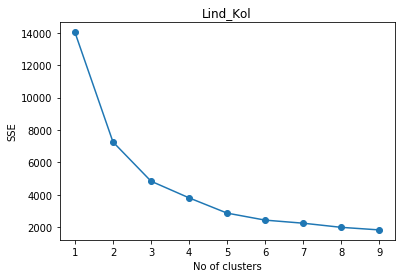

In [94]:
plt.plot(frame_kolk_Lind['Cluster'], frame_kolk_Lind['SSE'], marker='o')
plt.title('Lind_Kol')
plt.xlabel('No of clusters')
plt.ylabel('SSE')
plt.show()

In [96]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X_kolk_Lind)
pred=kmeans.predict(X_kolk_Lind)

In [97]:
kmeans.cluster_centers_

array([[1.87032086, 4.62834225, 4.10962567],
       [2.77303071, 1.61548732, 1.56341789],
       [4.31557923, 4.49800266, 3.33821571]])

In [98]:
pd.Series(pred).value_counts()


2    751
1    749
0    748
dtype: int64

In [99]:
X_kolk_Lind['Cluster'] = pd.Series(pred, index=X_kolk_Lind.index)
X=X_kolk_Lind.drop('Cluster', axis=1)
Y=X_kolk_Lind['Cluster']

C:\Users\samni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [100]:
#applying decision tree
clf=DecisionTreeClassifier()

#fitting a model
clf=clf.fit(X,Y)

tree.export_graphviz(clf, out_file='tree_UK.dot') 

In [102]:
X_Vivid_Kol=data_Vivid_fashion_kolkata_rfm[['r_quartile', 'f_quartile', 'm_quartile']]
SSE_Vivid_Kol=[]
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(X_Vivid_Kol)
    SSE_Vivid_Kol.append(kmeans.inertia_)
frame_Vivid_Kol = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE_Vivid_Kol})
frame_Vivid_Kol

,Cluster,SSE
0,1,10896.687463
1,2,5968.215446
2,3,4308.219097
3,4,3268.373822
4,5,2679.175207
5,6,2190.560875
6,7,1853.621991
7,8,1663.903638
8,9,1528.239550


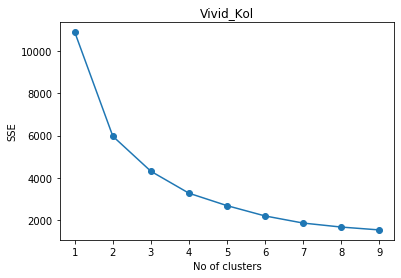

In [103]:
plt.plot(frame_Vivid_Kol['Cluster'], frame_Vivid_Kol['SSE'], marker='o')
plt.title('Vivid_Kol')
plt.xlabel('No of clusters')
plt.ylabel('SSE')
plt.show()

In [105]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X_Vivid_Kol)
pred=kmeans.predict(X_Vivid_Kol)

In [106]:
kmeans.cluster_centers_

array([[2.41914191, 1.72772277, 1.70957096],
       [4.35159011, 3.92226148, 3.11484099],
       [2.13939394, 4.73131313, 4.57777778]])

In [107]:
pd.Series(pred).value_counts()

0    606
1    566
2    495
dtype: int64

In [108]:
X_Vivid_Kol['Cluster'] = pd.Series(pred, index=X_Vivid_Kol.index)
X=X_Vivid_Kol.drop('Cluster', axis=1)
Y=X_Vivid_Kol['Cluster']

C:\Users\samni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
#applying decision tree
clf=DecisionTreeClassifier()

#fitting a model
clf=clf.fit(X,Y)

tree.export_graphviz(clf, out_file='tree_GER.dot') 

In [112]:
X_City_mall1_kol=data_City_mall1_kol_rfm[['r_quartile', 'f_quartile', 'm_quartile']]
SSE_City_mall1_kol=[]
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(X_City_mall1_kol)
    SSE_City_mall1_kol.append(kmeans.inertia_)
frame_City_mall1_kol = pd.DataFrame({'Cluster':range(1,10), 'SSE': SSE_City_mall1_kol})
frame_City_mall1_kol

,Cluster,SSE
0,1,12430.697791
1,2,6448.448373
2,3,4536.026201
3,4,3448.123665
4,5,2763.703616
5,6,2363.938342
6,7,2126.798043
7,8,1945.502982
8,9,1756.347866


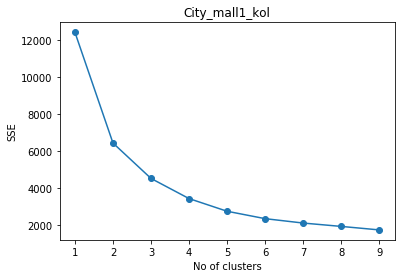

In [113]:
plt.plot(frame_City_mall1_kol['Cluster'], frame_City_mall1_kol['SSE'], marker='o')
plt.title('City_mall1_kol')
plt.xlabel('No of clusters')
plt.ylabel('SSE')
plt.show()

In [115]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(X_City_mall1_kol)
pred=kmeans.predict(X_City_mall1_kol)

In [116]:
kmeans.cluster_centers_

array([[3.19966302, 4.41027801, 3.92333614],
       [2.66708075, 1.76645963, 1.64347826]])

In [117]:
pd.Series(pred).value_counts()

0    1187
1     805
dtype: int64

In [118]:
X_City_mall1_kol['Cluster'] = pd.Series(pred, index=X_City_mall1_kol.index)
X=X_City_mall1_kol.drop('Cluster', axis=1)
Y=X_City_mall1_kol['Cluster']

C:\Users\samni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
#applying decision tree
clf=DecisionTreeClassifier()

#fitting a model
clf=clf.fit(X,Y)

tree.export_graphviz(clf, out_file='tree_FRA.dot') 

In [121]:
data_Lindsay_kolkata['UniqueItemName'] = data_Lindsay_kolkata['UniqueItemName'].str.strip()
data_Vivid_fashion_kolkata['UniqueItemName'] = data_Vivid_fashion_kolkata['UniqueItemName'].str.strip()
data_City_mall1_kol['UniqueItemName'] = data_City_mall1_kol['UniqueItemName'].str.strip()

C:\Users\samni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\samni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\samni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [122]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [124]:
basket_Lind_kol = pd.pivot_table(data_Lindsay_kolkata, index='ModifiedBillNo', columns='UniqueItemName', values='ItemQty', fill_value=0)
basket_Lind_kol.head()

UniqueItemName,8.90E+12,8.91E+12,A15P1718-0003600,A15P1718-0003672,A15P1718-0003790,A15P1718-0003832,A15P1718-0003836,A15P1718-0003851,A15P1718-0003944,A15P1718-0003958,...,A15P1718-0004330,A15P1718-0004374,ACCESSORIES,GILET,JACKET,JEANS TROUSER,PLAINS,SUIT,TROUSER,\N
ModifiedBillNo,,,,,,,,,,,,,,,,,,,,,
CM/00001/Apr/18,0,1.0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
CM/00002/Apr/18,0,1.0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
CM/00003/Apr/18,0,1.0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
CM/00004/Apr/18,0,1.0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
CM/00005/Apr/18,0,1.0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0


In [127]:
basket_sets_Lind_kol = basket_Lind_kol.applymap(encode_units)
#basket_sets_Lind_kol.drop('', inplace=True, axis=1)

In [170]:
frequent_itemsets_Lind_kol = apriori(basket_sets_Lind_kol, min_support=0.001, use_colnames=True)
frequent_itemsets_Lind_kol.head()

,support,itemsets
0,0.005839,(8.90E+12)
1,0.640876,(8.91E+12)
2,0.001460,(A15P1718-0003600)
3,0.001460,(A15P1718-0003672)
4,0.001460,(A15P1718-0003790)


In [171]:
rules_Lind_kol = association_rules(frequent_itemsets_Lind_kol, metric="lift")
rules_Lind_kol

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(8.91E+12),(8.90E+12),0.640876,0.005839,0.004380,0.006834,1.170273,0.000637,1.001001
1,(8.90E+12),(8.91E+12),0.005839,0.640876,0.004380,0.750000,1.170273,0.000637,1.436496
2,(ACCESSORIES),(PLAINS),0.054015,0.040876,0.004380,0.081081,1.983591,0.002172,1.043753
3,(PLAINS),(ACCESSORIES),0.040876,0.054015,0.004380,0.107143,1.983591,0.002172,1.059504
4,(SUIT),(ACCESSORIES),0.001460,0.054015,0.001460,1.000000,18.513514,0.001381,inf
5,(ACCESSORIES),(SUIT),0.054015,0.001460,0.001460,0.027027,18.513514,0.001381,1.026277
6,(ACCESSORIES),(\N),0.054015,0.296350,0.023358,0.432432,1.459193,0.007350,1.239764
7,(\N),(ACCESSORIES),0.296350,0.054015,0.023358,0.078818,1.459193,0.007350,1.026925
8,(GILET),(\N),0.005839,0.296350,0.002920,0.500000,1.687192,0.001189,1.407299
9,(\N),(GILET),0.296350,0.005839,0.002920,0.009852,1.687192,0.001189,1.004053


In [172]:
rules_Lind_kol[(rules_Lind_kol['lift'] >= 2) & (rules_Lind_kol['confidence'] >= 0.6)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(SUIT),(ACCESSORIES),0.001460,0.054015,0.001460,1.000000,18.513514,0.001381,inf
10,(JACKET),(\N),0.004380,0.296350,0.002920,0.666667,2.249589,0.001622,2.110949
18,(TROUSER),(\N),0.005839,0.296350,0.005839,1.000000,3.374384,0.004109,inf
31,"(TROUSER, PLAINS)",(\N),0.001460,0.296350,0.001460,1.000000,3.374384,0.001027,inf


In [173]:
basket_sets_Lind_kol['JACKET'].sum(),basket_sets_Lind_kol['TROUSER'].sum()

(3, 4)

In [177]:
basket_sets_Lind_kol['JACKET'].sum(),basket_sets_Lind_kol['SUIT'].sum(),basket_sets_Lind_kol['PLAINS'].sum() 

(3, 1, 28)

In [182]:
#### can be found for other stores as well association rule is very weak###